In [1]:
import numpy as np

In [2]:
ip1 =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]

ip2 =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]

ip3 =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
target =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

In [3]:
x =[np.array(ip1).reshape(1,30),np.array(ip2).reshape(1,30),np.array(ip3).reshape(1,30)]
y = np.array(target)
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
np.random.randn()

-1.2748143219614605

In [5]:
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

def f_forward(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
     
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)

def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

def loss_function(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)
   

def back_propagation(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))
 
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)
 
def training(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss_function(out, Y[i])))
            w1, w2 = back_propagation(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)  
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)
  
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Belongs to Class 1")
    elif(k == 1):
        print("Belongs to Class 2")
    else:
        print("Belongs to Class 3")
    plt.imshow(x.reshape(5, 6))
    plt.show()   
   
  

In [6]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 0.31148255 -1.00728546 -2.00519412 -0.3278942   0.16432948]
 [-0.37091519  1.59581369  0.2202358   1.5010441  -0.0666417 ]
 [ 0.05951928  1.06862948  1.18469    -0.71264167  0.1618424 ]
 [-0.36179256 -0.95992206  1.47855211  0.63973117  0.54195414]
 [-1.01140604 -1.19977371  0.87175551 -1.15730165  0.69194542]
 [ 0.85806216 -0.34751788  0.86211805  1.40253026 -0.30205607]
 [ 0.35361122 -0.81748729 -0.40952438  0.22904894 -0.67390062]
 [-3.34986691 -0.97533258 -0.19904465 -1.00473334  0.13247931]
 [ 0.19185859  0.5355284  -0.44129096  0.50627497 -0.85272715]
 [ 0.75392367  0.56139446 -0.41338126 -0.19766523  0.9532932 ]
 [-2.08285589 -0.66644263  0.01691769  0.54291475  0.37463807]
 [-0.08530967 -1.42788963 -0.85766988  0.16230769  1.14903975]
 [-1.46668621  0.19735622  0.07801184 -0.40370605  0.02693879]
 [ 1.76548697 -0.52209027  1.91829555  0.00977204 -2.51950525]
 [-0.69095164  0.16871636 -0.25295599  0.03057418  0.83458565]
 [ 0.87570694 -1.60655036  1.82799001 -0.90838644  0.94

In [7]:
acc, losss, w1, w2 = training(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 72.62837407414395
epochs: 2 ======== acc: 73.30497839119032
epochs: 3 ======== acc: 73.86946918348094
epochs: 4 ======== acc: 74.34819463578077
epochs: 5 ======== acc: 74.76146057281719
epochs: 6 ======== acc: 75.12418433967267
epochs: 7 ======== acc: 75.44711089792784
epochs: 8 ======== acc: 75.73803351248198
epochs: 9 ======== acc: 76.00279757848693
epochs: 10 ======== acc: 76.24603945399826
epochs: 11 ======== acc: 76.47168778194249
epochs: 12 ======== acc: 76.68327943336001
epochs: 13 ======== acc: 76.88414260832559
epochs: 14 ======== acc: 77.07748992519166
epochs: 15 ======== acc: 77.26645188599963
epochs: 16 ======== acc: 77.45406966997882
epochs: 17 ======== acc: 77.6432575704275
epochs: 18 ======== acc: 77.83674038550411
epochs: 19 ======== acc: 78.03697005150953
epochs: 20 ======== acc: 78.24602860650074
epochs: 21 ======== acc: 78.46553009046154
epochs: 22 ======== acc: 78.69653974700317
epochs: 23 ======== acc: 78.93953126543306
epochs: 24 ======== a

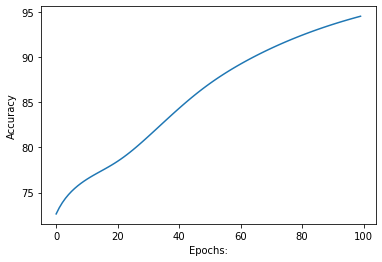

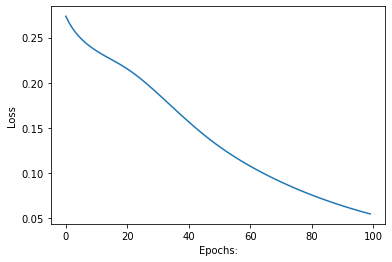

In [8]:
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [9]:
# the trained weights are
print(w1, "\n", w2)

[[ 0.31148255 -1.00728546 -2.00519412 -0.3278942   0.16432948]
 [-0.48288986  1.3545525   0.29690282  1.50214218 -0.32724093]
 [ 0.37255991  1.14924988  1.26047465 -0.64531075 -0.27049277]
 [-0.04875193 -0.87930167  1.55433676  0.7070621   0.10961898]
 [-1.12338072 -1.4410349   0.94842253 -1.15620357  0.43134619]
 [ 0.85806216 -0.34751788  0.86211805  1.40253026 -0.30205607]
 [ 0.35361122 -0.81748729 -0.40952438  0.22904894 -0.67390062]
 [-3.03682628 -0.89471219 -0.12326001 -0.93740241 -0.29985585]
 [ 0.19185859  0.5355284  -0.44129096  0.50627497 -0.85272715]
 [ 0.75392367  0.56139446 -0.41338126 -0.19766523  0.9532932 ]
 [-1.65752924 -0.41090394  0.01380854  0.61334617  0.77172309]
 [-0.08530967 -1.42788963 -0.85766988  0.16230769  1.14903975]
 [-1.04167091  0.5192378   0.07712947 -0.33747321 -0.14479715]
 [ 2.0785276  -0.44146987  1.9940802   0.07710297 -2.95184041]
 [-0.26562499  0.42425505 -0.25606513  0.1010056   1.23167068]
 [ 1.3010336  -1.35101167  1.82488087 -0.83795502  1.34